## Author: Ahmed Taha
### We will go through the implemention of the KNN classifier 
### The KNN algorithm is a supervised learning algorithm where KNN stands for K-Nearest Neighbor. Usually, in most supervised learning algorithms, we train the model using training data set to create a model that generalizes well to predict unseen data.



## How The KNN Works??

### it searches for the K nearest neighbors to that data point. The nearest neighbors are found by calculating the distance between the given data point and the data points in the initial dataset. You can use techniques like Euclidean distance, Manhattan distance, Cosine distance to calculate distance

## Points of consideration while implmenting the knn 

###  KNN is computationally expensive since it loads the entire dataset in the memory for classification. When the number of features of the dataset is very high it may suffer from curse of dimensionality and may perform poorly.
### There is another aspect of the choice of the value of ‘K’ that can produce different results for different values of K. Hence hyperparameter tuning of K becomes an important role in producing a robust KNN classifier. In Sklearn we can use GridSearchCV to find the best value of K from the range of values.
### Better Value for K shoud be odd value
### One of The Important Thing before training the knn algorthim is feature scalling since we find the nearest neighbour by get the distance of new data point to all the data points so we need our feature with same scale to prevent the one feature to be dominat on other one  

# DataSet


### Our data is Iris data set is data contains features of diffrent type of flowers 
### This types is :setosa,versicolor,virginica
### Feature of this flowers is : SepalLengthCm,SepalWidthCm,PetalLengthCm ,PetalWidth
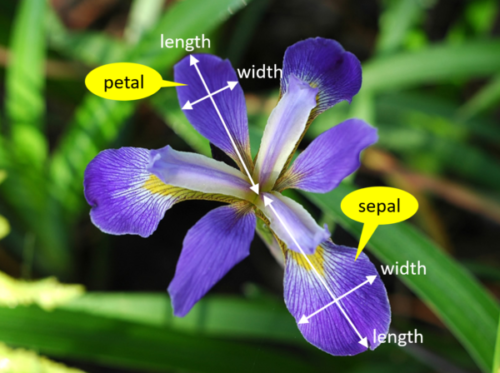

# Modules

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns

## Load the data 

In [7]:
iris=load_iris()

## Print the featuers names in data

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Print the types of flowers 

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Convert the data into pandas data frame to can manipulate the data

#### This line to concatenate the data of iris with target  to be in one dataframe
data=np.c_[iris['data'],iris['target']]

In [10]:
iris_dataframe=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target_names'])
print(iris_dataframe.shape)
iris_dataframe.head()

(150, 5)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target_names  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

## That's time to split the data Let's do it
###### note:  
###### iris_dataframe.iloc[:,:-1] means takes all the rows from the first colum (sepal length to petal width) this is our featuers
######  ris_dataframe.iloc[:,-1] means takes all the rows of the last colum only 

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(iris_dataframe.iloc[:,:-1],iris_dataframe.iloc[:,-1]
                                           ,test_size=0.2
                                           ,shuffle=True,random_state=0                                          
                                          )

## Print the shape of the data

In [12]:
print(f"xtrain shape is :{xtrain.shape}\nytrain shape is:{ytrain.shape}\nxtest shape is:{xtest.shape}\nytest shape is:{ytest.shape}")

xtrain shape is :(120, 4)
ytrain shape is:(120,)
xtest shape is:(30, 4)
ytest shape is:(30,)


# Normlization of the data (feature scaling)
### What is Normalization?
### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
### Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.
### why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

## Visualize the data before the normlization 

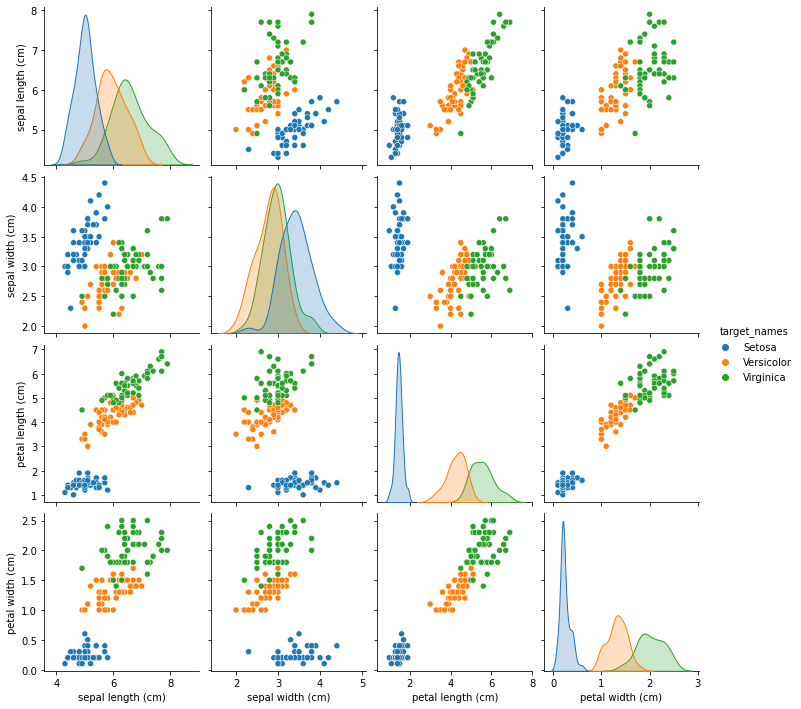

In [13]:
dic_targetcat= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} 
data_befor_nor= sns.pairplot(iris_dataframe.replace({'target_names': dic_targetcat}), hue= 'target_names')

## Normlaizing the data

In [17]:
scaler= Normalizer().fit(xtrain) 
normalized_xtrain= scaler.transform(xtrain) 
normalized_xtest= scaler.transform(xtest) 

## Visualize the data after the normlization 

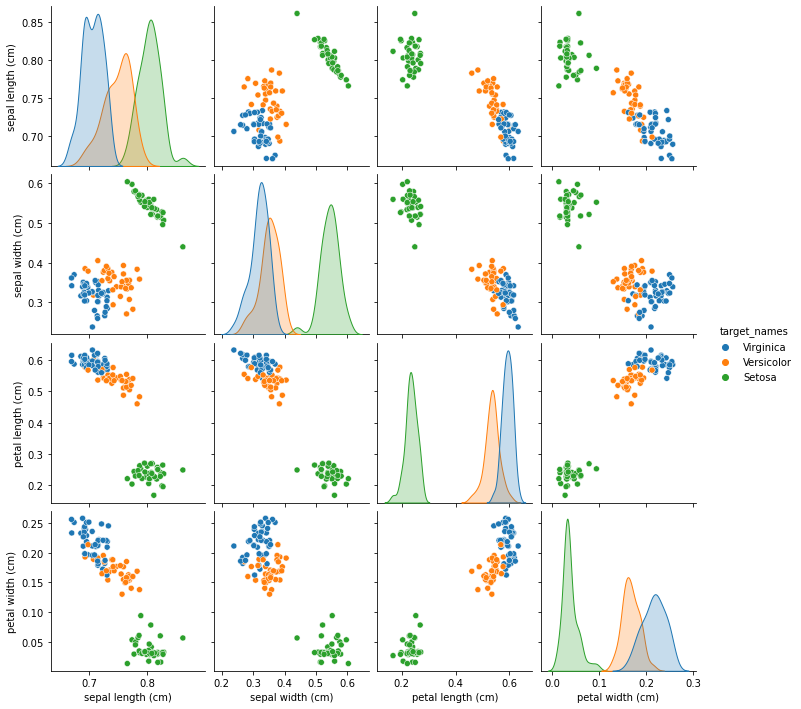

In [18]:
normlaized_dataframe=pd.DataFrame(data=np.c_[normalized_xtrain,ytrain],columns=iris["feature_names"]+["target_names"])
dic_targetcat= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} 
data_after_nor= sns.pairplot(normlaized_dataframe.replace({'target_names': dic_targetcat}), hue= 'target_names')

## Now we need to get the value of k  for our model so we will use the gridsearch cross validation 

In [27]:
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)
grid_search=grid.fit(normalized_xtrain, ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
{'n_neighbors': 3}
0.9666666666666666


## Now will train the model at k=3

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(normalized_xtrain,ytrain) 

KNeighborsClassifier(n_neighbors=3)

# Evalute The model using cross validation 

In [34]:
the_Score=cross_val_score(knn,normalized_xtrain,ytrain,cv=5)
the_Score

array([0.91666667, 1.        , 1.        , 1.        , 0.91666667])

## The mean of the score is our model accuracy 

In [36]:
the_Score.mean()

0.9666666666666666

## Plot Confusion Matrix

Text(42.0, 0.5, 'Truth')

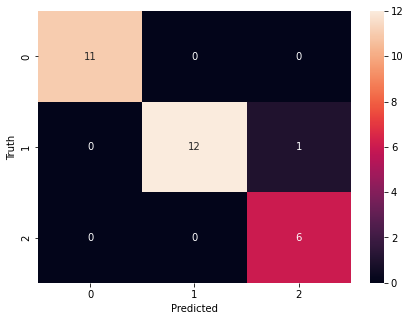

In [24]:
ypred = knn.predict(xtest)
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Show The Precision,recall,F1-Score of the model 

In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

